In [67]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Thompson sampling

In [68]:
regret_ts = np.load('ts_bandits_regrets.npy')
l2_ts = np.load('ts_bandits_l2_dist.npy')
ns_ts = np.load('ts_bandits_Ns.npy')

### KL

In [69]:
regret_kl = np.load('kl_bandits_regrets.npy')
l2_kl = np.load('kl_bandits_l2_dist.npy')
ns_kl = np.load('kl_bandits_Ns.npy')

### linUCB

In [94]:
regret_ucb = np.load('ucb_bandits_regrets.npy')
l2_ucb = np.load('ucb_bandits_l2_dist.npy')
ns_ucb = np.load('ucb_bandits_Ns.npy')

### BGE

In [71]:
regret_bge = np.load('bge_bandits_regrets.npy')
l2_bge = np.load('bge_bandits_l2_dist.npy')
ns_bge = np.load('bge_bandits_Ns.npy')

### Plot thompson

In [72]:
nus = [1e-4, 1e-3, 1e-2, 5e-1, 1e-1, 1]
taus = [10, 25, 50, 100]

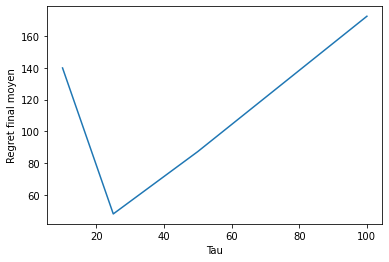

In [73]:
taus_best_ts = np.min(regret_ts[:,:,-1], axis = 0)

plt.plot(taus, taus_best_ts)
plt.xlabel('Tau')
plt.ylabel('Regret final moyen');

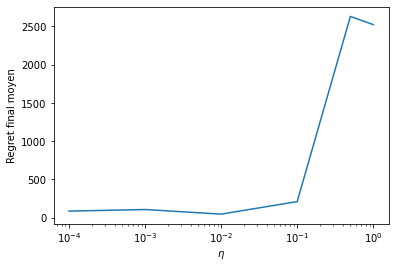

In [74]:
nus_best_ts = np.min(regret_ts[:,:,-1], axis = 1)
idx = np.argsort(nus)

plt.semilogx(np.array(nus)[idx], nus_best_ts[idx])
plt.xlabel('$\eta$')
plt.ylabel('Regret final moyen');

### Plot KL

In [75]:
nus = [1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 1]
taus = [10, 25, 50, 100]

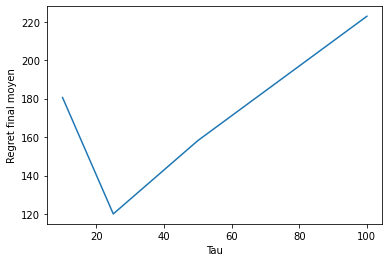

In [76]:
taus_best_kl = np.min(regret_kl[:,:,-1], axis = 0)

plt.plot(taus, taus_best_kl)
plt.xlabel('Tau')
plt.ylabel('Regret final moyen');

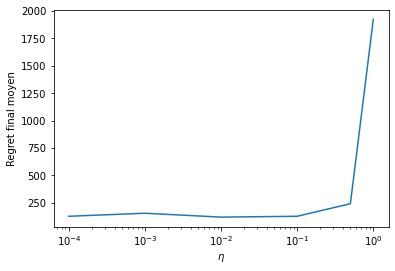

In [77]:
nus_best_kl = np.min(regret_kl[:,:,-1], axis = 1)


plt.semilogx(nus, nus_best_kl)
plt.xlabel('$\eta$')
plt.ylabel('Regret final moyen');

### Plot UCB

In [78]:
Cs = [1e-1, 0.25, 0.5, 1, 5]

In [79]:
regret_ucb.shape

(5, 5001)

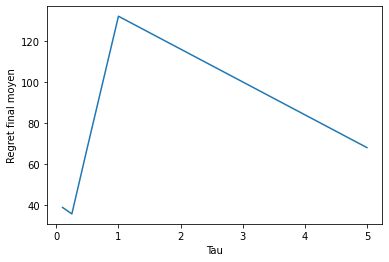

In [80]:
plt.plot(Cs, regret_ucb[:,-1])
plt.xlabel('Tau')
plt.ylabel('Regret final moyen');

### Plot BGE

In [81]:
nus = [1e-4, 1e-3, 1e-2, 5e-1, 1e-1, 1]
Cs = [1e-1, 0.25, 0.5, 1, 5]
taus = [10, 50, 100]

In [82]:
regret_bge.shape

(6, 5, 3, 5001)

In [83]:
best_taus_bge = np.min(regret_bge[:,:,:,-1], axis=(0,1))

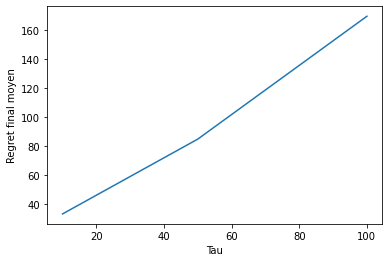

In [84]:
best_taus_bge = np.min(regret_bge[:,:,:,-1], axis=(0,1))

plt.plot(taus, best_taus_bge)
plt.xlabel('Tau')
plt.ylabel('Regret final moyen');

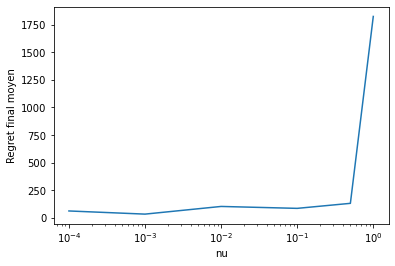

In [85]:
best_nus_bge = np.min(regret_bge[:,:,:,-1], axis=(1,2))

idx = np.argsort(nus)

plt.semilogx(np.array(nus)[idx], best_nus_bge[idx])
plt.xlabel('nu')
plt.ylabel('Regret final moyen');

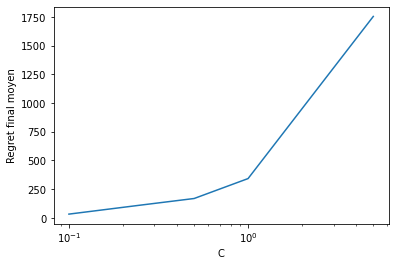

In [86]:
best_Cs = np.min(regret_bge[:,:,:,-1], axis=(0,2))

plt.semilogx(Cs, best_Cs)
plt.xlabel('C')
plt.ylabel('Regret final moyen');

In [100]:
l2_bge.shape

(6, 5, 3, 5000)

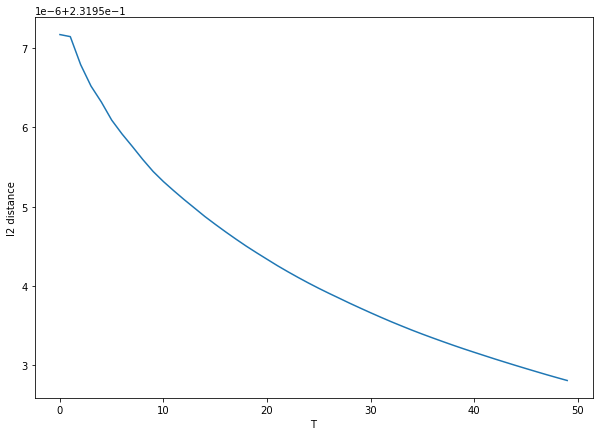

In [130]:
plt.figure(figsize=(10,7))
plt.plot(1/3*np.sqrt(np.sqrt(l2_bge[0,0,2][l2_bge[0,0,2]>0])))
plt.xlabel('T')
plt.ylabel('l2 distance');

In [119]:
ns_bge.shape

(6, 5, 3, 10)

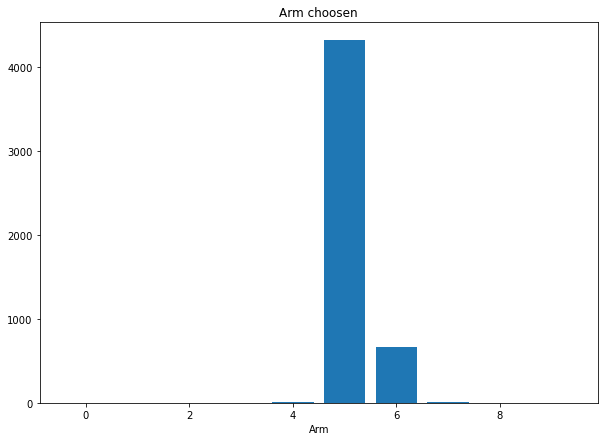

In [121]:
plt.figure(figsize=(10,7))
plt.bar(range(10), ns_bge[0,0,0])
plt.title('Arm choosen')
plt.xlabel('Arm')
plt.show()

### Best traj

In [87]:
np.argmin(regret_bge[:,:,:,-1].reshape(-1, 1))

15

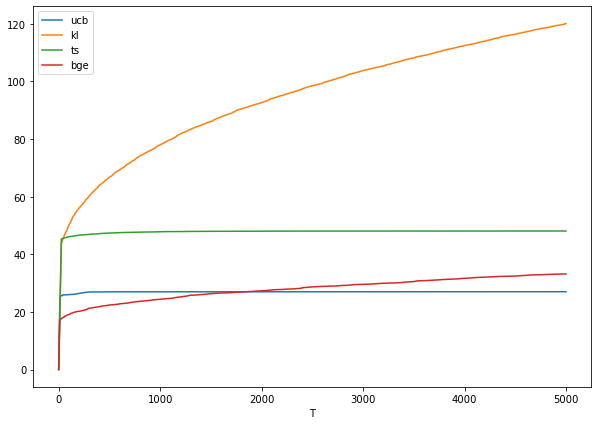

In [95]:
min_bge = np.argmin(regret_bge[:,:,:,-1].reshape(-1, 1))
min_ts = np.argmin(regret_ts[:,:,-1].reshape(-1,1))
min_kl = np.argmin(regret_kl[:,:,-1].reshape(-1,1))
min_ucb = np.argmin(regret_ucb[:,-1].reshape(-1,1))

plt.figure(figsize = (10, 7))
plt.plot(regret_ucb.reshape(-1,5001)[min_ucb], label='ucb')
plt.plot(regret_kl.reshape(-1, 5001)[min_kl], label='kl')
plt.plot(regret_ts.reshape(-1, 5001)[min_ts], label='ts')
plt.plot(regret_bge.reshape(-1, 5001)[min_bge], label= 'bge')
plt.legend()
plt.xlabel('T');

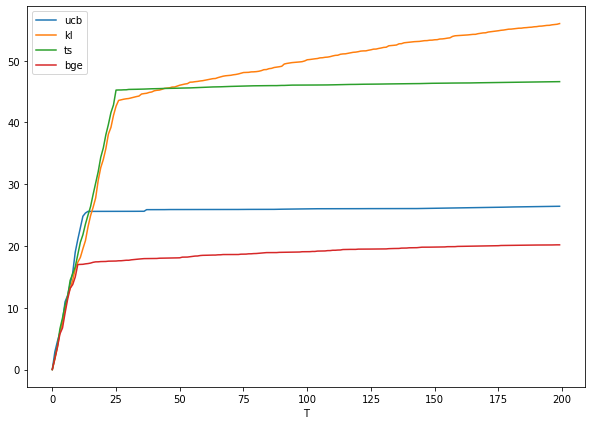

In [97]:
min_bge = np.argmin(regret_bge[:,:,:,-1].reshape(-1, 1))
min_ts = np.argmin(regret_ts[:,:,-1].reshape(-1,1))
min_kl = np.argmin(regret_kl[:,:,-1].reshape(-1,1))
min_ucb = np.argmin(regret_ucb[:,-1].reshape(-1,1))

plt.figure(figsize = (10, 7))
plt.plot(regret_ucb.reshape(-1,5001)[min_ucb][:200], label='ucb')
plt.plot(regret_kl.reshape(-1, 5001)[min_kl][:200], label='kl')
plt.plot(regret_ts.reshape(-1, 5001)[min_ts][:200], label='ts')
plt.plot(regret_bge.reshape(-1, 5001)[min_bge][:200], label= 'bge')
plt.legend()
plt.xlabel('T');

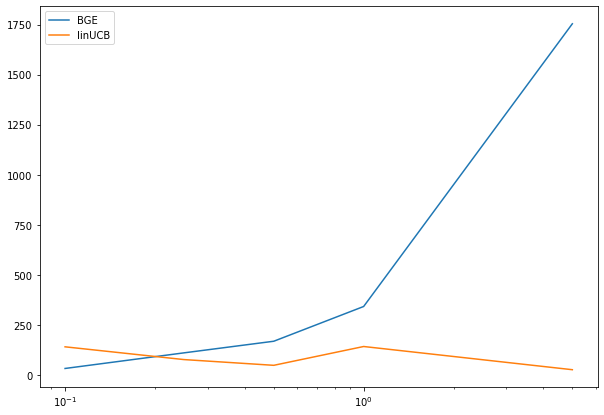

In [125]:
plt.figure(figsize=(10, 7))

best_Cs = np.min(regret_bge[:,:,:,-1], axis=(0,2))

plt.semilogx(Cs, best_Cs, label='BGE')

plt.semilogx(Cs, regret_ucb[:,-1], label='linUCB')

plt.legend();

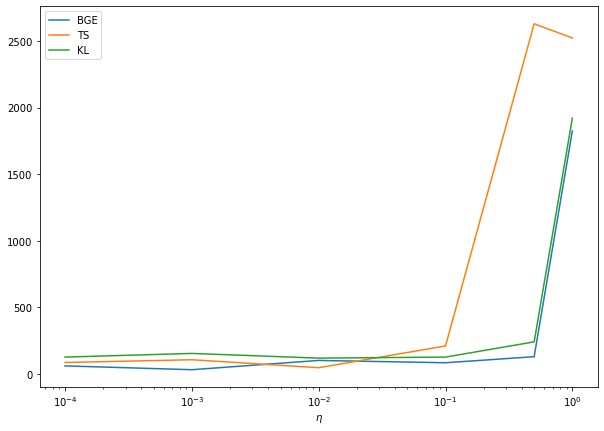

In [128]:
plt.figure(figsize=(10,7))

nus = [1e-4, 1e-3, 1e-2, 5e-1, 1e-1, 1]


best_nus_bge = np.min(regret_bge[:,:,:,-1], axis=(1,2))

idx = np.argsort(nus)

plt.semilogx(np.array(nus)[idx], best_nus_bge[idx], label='BGE')


nus = [1e-4, 1e-3, 1e-2, 5e-1, 1e-1, 1]

nus_best_ts = np.min(regret_ts[:,:,-1], axis = 1)
idx = np.argsort(nus)

plt.semilogx(np.array(nus)[idx], nus_best_ts[idx], label='TS')

nus = [1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 1]

nus_best_kl = np.min(regret_kl[:,:,-1], axis = 1)

plt.semilogx(nus, nus_best_kl, label='KL')
plt.xlabel('$\eta$')
plt.legend();